# Dependency Survey Results

### Download information

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = "Dependency Management Survey_August 14, 2018_17.25.csv"
df = pd.read_csv(file)
df = df[5:]

### Check data and wrangle

In [3]:
df.head(2)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Package Managers,Package Managers_19_TEXT,Semantic Versioning,Declaring deps,Declaring deps_5_TEXT,Approach change,Appr change reason,Versioning tools,Which tools,Commentary
5,2018-07-31 17:43:20,2018-07-31 18:11:27,0,130.123.29.249,10,1686,0,2018-08-07 18:11:37,R_1MKTZ4IAnFtimKN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-08-07 20:16:54,2018-08-07 20:20:56,0,125.236.232.186,100,242,1,2018-08-07 20:20:57,R_22xdsNb7lmM7e5X,NaN,...,"2,12",NaN,2,4,NaN,2,NaN,2,NaN,Versioning libs is a pain. The best approach i...


In [4]:
# Drop unnecessary columns
df = df.drop(labels=['RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'StartDate', 'EndDate', 'Duration (in seconds)', 'RecordedDate', 'ResponseId', 'DistributionChannel'], axis=1)
df = df[df['Finished'] == '1']
df = df.drop(labels=['Finished', 'Progress', 'Status'], axis=1)

In [5]:
# Check all are English, and then drop if so
if (df[df['UserLanguage'] != 'EN'].size == 0): 
    df.drop(labels=['UserLanguage'], axis=1)

In [6]:
# df.info()

In [7]:
cats = ['XP', 'Semantic Versioning', 'Declaring deps', 'Approach change', 'Versioning tools']
df[cats] = df[cats].astype('int32')

In [8]:
# df.head()

In [9]:
def clean(x):
    if x == 4:
        return 3
    elif x == 8:
        return 4
    elif x == 12:
        return 5
    else:
        return x

print(df['Semantic Versioning'].unique())
df['Semantic Versioning'] = df['Semantic Versioning'].apply(clean)
df['Semantic Versioning'].unique()

[ 2 12  1  8  4]


array([2, 5, 1, 4, 3], dtype=int64)

In [10]:
df[['Declaring deps', 'Approach change', 'Versioning tools', 'XP', 'Semantic Versioning']] = df[['Declaring deps', 'Approach change', 'Versioning tools', 'XP', 'Semantic Versioning']].astype('category')

In [11]:
df['Declaring deps'].cat.categories = ['Fixed', 'Ranges', 'Depends', 'Follows Others', 'Other']
df['XP'].cat.categories = ['0-2 Years', '2-5 Years', '5-10 Years', '10-20 Years', '20+ Years']
df['Approach change'].cat.categories = ['Yes', 'No']
df['Versioning tools'].cat.categories = ['Yes', 'No']
df['Semantic Versioning'].cat.categories = ['1 (Least Familiar)', '2', '3', '4', '5 (Most Familiar)']

# Statistics

### Package Managers

In [12]:
# Change numeric package managers into binary columns for further analysis
def packagemanagers(x):
    managers = [False] * 18
    res = [int(y) for y in x.split(",")]
    for i in res:
        # 8 is empty
        managers[i-1 if i < 8 else i-2] = True
    return pd.Series(managers)

cols = ['Atom', 'CPAN', 'CRAN', 'Cargo', 'Dub', 'Elm', 'Haxelib', 'Hex', 'Homebrew', 'Maven', 'NPM', 'NuGet', 'Composer', 'Pub', 'Pypi', 'Rubygems', 'Puppet', 'Other'] 
df[cols] = df['Package Managers'].apply(packagemanagers)
df[cols].sum()

Atom         6
CPAN        15
CRAN         6
Cargo       22
Dub          0
Elm          4
Haxelib      0
Hex          2
Homebrew    54
Maven       46
NPM         90
NuGet       22
Composer    11
Pub          1
Pypi        55
Rubygems    29
Puppet       4
Other       50
dtype: int64

### Categorical Data

#### Awareness of Semantic Versioning

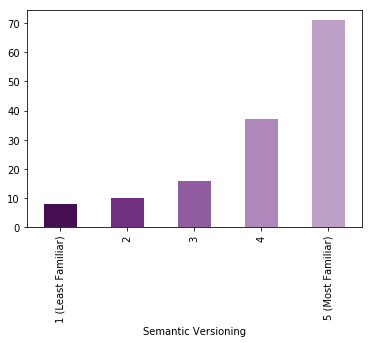

In [13]:
import matplotlib as plt
%matplotlib inline

colours = ['#460f54','#713082','#925da0','#af87ba', '#be9fc6', '#d3bed8', '#eae1ed' ]

df.groupby('Semantic Versioning')['Semantic Versioning'].count().plot(kind='bar', color = colours)

So in general people are quite well aware of semantic versioning (1 being unaware, to 5 being very familiar with it). A little under half have changed their approach to dependencies (1 is yes, 2 is no), while about 60% use versioning tools for their own projects (1 is yes, 2 is no).

#### Developer Experience

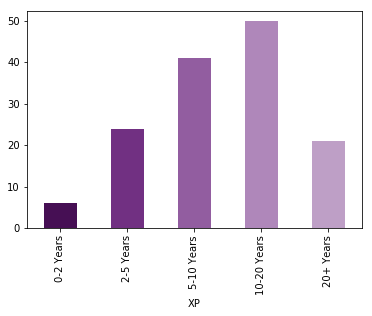

In [14]:
df.groupby('XP')['XP'].count().plot(kind='bar', color=colours)

Experience here is from less than 2 years (option 1) to over 20 years (option 5). Most respondents were within the 5-20 year experience bracket.

#### How developers choose their dependencies

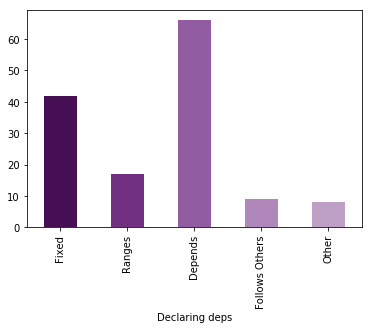

In [15]:
df.groupby('Declaring deps')['Declaring deps'].count().plot(kind='bar', color=colours)

Looking at the above, there is about an even split between those who always use either fixed or ranged dependencies, and those who vary based on the situation. This implies that developers are reasonably aware of the risks and rewards involved.

#### Dependency declaration patterns by package manager

In [16]:
round(df.groupby('Declaring deps')[cols].sum() / df[cols].sum() * 100)

,Atom,CPAN,CRAN,Cargo,Dub,Elm,Haxelib,Hex,Homebrew,Maven,NPM,NuGet,Composer,Pub,Pypi,Rubygems,Puppet,Other
Declaring deps,,,,,,,,,,,,,,,,,,
Fixed,33.0,20.0,67.0,27.0,NaN,25.0,NaN,0.0,35.0,43.0,27.0,23.0,18.0,0.0,31.0,17.0,0.0,26.0
Ranges,0.0,7.0,17.0,5.0,NaN,25.0,NaN,0.0,7.0,0.0,10.0,5.0,36.0,0.0,5.0,7.0,0.0,14.0
Depends,67.0,47.0,17.0,59.0,NaN,25.0,NaN,100.0,48.0,48.0,52.0,68.0,45.0,100.0,56.0,72.0,75.0,40.0
Follows Others,0.0,20.0,0.0,5.0,NaN,0.0,NaN,0.0,2.0,9.0,7.0,5.0,0.0,0.0,4.0,0.0,25.0,6.0
Other,0.0,7.0,0.0,5.0,NaN,25.0,NaN,0.0,7.0,0.0,4.0,0.0,0.0,0.0,4.0,3.0,0.0,14.0


The above numbers are given in percentage points of the overall responses and sum to 100 along each column.

There is some variation based on the package manager used, but certainly less than expected based on the numerical data, of NPM vs Maven for example.

### Reasons for Changing Dependency Style

In [17]:
temp = [print(x + "\n\n") for x in df['Appr change reason'].dropna()]

Changes due to diversifying the list of technologies I've used or developed with. Some languages or projects are best to declare a particular version. I found this is especially true of embedded development. However, not so much when it comes to higher level development.


Staying away form NPM when possible, creating an angular 2 project should not pull 50k dependency files.


In the bad old days, we named our dependencies only, got them from the system package manager, and things almost worked, until Debian Stale didn't have the exact ruby gem or perl module you wanted, and then you hacked it yourself.

Now we have language-specific package managers with transitive dependency locking and a focus on reproducibility, and the world is better for it. If only each language-specific package manager wasn't reinventing so much of the wheel in a different color.

See also:
 - Yarn's (short-lived) triumph over npm for having mandatory and sensible lockfiles.
 - Npm's subsequent response of add

More people are going from ranges to fixed, because they have been burned by patch and minor update releases. However, there is a notable minority that have relaxed their standards, adopting more of a SemVer based minor range approach, so there is not one single clear direction in changes of practice. There are also some differences between commercial builds and open source builds (With open source builds being more relaxed). There are a number of complaints about the number of transitive dependencies within the NPM community, leading to extremely bloated builds. It seems that almost all responses here come back to upstream enforcement of SemVer. In general, those who work with maintenance of legacy code prefer to go to fixed versions rather than ranges.


Quotes:

"Used to be more likely to pin ranges. Now more likely to pin dependencies to a fixed version and use a bit/service like pyup/greenkeeper/dependabot/whatever. Partly because tooling has improved/ become more available. Partly because I am more familiar with it. Partly my code is better tested so can be more confident knowing version bump is safe."

"in serious production code, always fixed version... in open source code, more relaxed"

"At work, some packages we are told to keep under a certain range because it is more supported."

"Taking end-to-end responsibility for software conception, development, and deployment, requires predictable outcomes. If you do not use fixed versions, then rebuilding an artifact to resolve an issue identified during QA testing can cause unrelated changes that can manifest in production."

"It's very painful to keep npm packages up to date due to the huge number of dependencies, and the assumption that the dev environment will allow unrestricted access to the external internet."

"You begin to realize how sloppy upstream people are, and the issues it causes, so you get a bit better about it."

"Because while exact versions give you predictability, they're difficult to keep up to date in manually when you have a lot of dependencies (particularly with pip; pipenv improves on that)."

"Mainly looking at the security checks of older dependencies and figuring out how to minimize the amount of dependencies so that the dependencies that are used can be scrutinized for security vulnerabilities along with using the latest versions (typically those two things correlate)"

"I used to be very careful with specifying ranges (e.g. 3.3.x only, not 3.x) but from my experience, any type of package change is prone to changing behaviour or breaking things. I now rely on testing (automated and QA) to catch any changes when updating packages."

### Tools Used

In [18]:
temp = [print(x + "\n\n") for x in df['Which tools'].dropna()]

A header expension in Sublime or VSCode


Mercurial, Git


Git (ambiguous question, apologies for any misunderstanding)


git


Git


Our CI server versions on build


git if that's what you mean, custom scripts to extract actual version of all dependency binaries if that's what you mean.


git, hg


git


git


git


Git


Git, via TFS mostly


Svn, git— labels 


Git


git


git


Visual Studio


Scripts to align npm versions and git tags


Subversion, Git


cargo update, cargo outdated


npm


IntelliJ IDEA, scripts


Sourcetree


Git, source tree


pyup


Git


Subversion


Git and/or fossil


git


git


Semantic release


git, magit. 


Git


git


git, mercurial


git


Git, SVN


git & custom tools


git tags


bumpversion


Git


git


house made tools


git


https://gitlab.com/philbooth/please-release-me


Git, sbt-release, cabal-release


bazaar


lerna


git


git


svn, git


git


git, mercurial


Git


git


git


npm


git


git


git


git


Git (university, private p

Most respondents use Git for versioning tools.

### General Comments

In [19]:
temp = [print(x + "\n\n") for x in df['Commentary'].dropna()]

Versioning libs is a pain. The best approach is to try to keep up to date. Avoid bit rot and avoid the same infrastructure requiring different versions. 


Not currently using any tools to version code but we do not write many public libraries. Would defiantly like to see more tooling in this area in order to give more trust to Semantic Versioning.


JavaScript versioning is a pain in the ass


I typically use the tools to lock in the versions. So the versions are locked and committed to the repository, so if they change they are stored in version control. Tools like Rubygems, Go dep, NPM, Yarn can do this. So I don't chose the version, but the tool does.


Fixed versions are imperative to ensure all developers and build machines produce equivalent artifacts


I never check dependencies in to the code base. 


Libraries associated with a single deliverable product are versioned together and kept in-sync.


Gentoo portage's slots are very interesting and useful


I will randomly call an

A general summary is that there are a range of developers who took part - some who don't work with very high stakes applications of dependency management, so they do not really understand the pitfalls of it, how their package manager resolves conflicts, or don't mind things breaking, to those who have to deal with it often. In general the consensus is that it is difficult for developers. There is a lot of variety in the ideas that people have of how to fix the problem, which perhaps is to be expected given how varied the solutions to the problem are across the various package managers. Several dislike the NPM style of dependency management and there are comments that web developers play fast and loose with their dependencies.


Quotes:

"In web development, dependency management is very, very relaxed."

"Semantic versioning is more of a social contract than anything technically precise. In Rubygems and NPM, you never really know what a minor or patch version is—it’s down to the author/publisher who often have their own idiosyncratic ideas about what to communicate through version numbers. Some claim to use semantic versioning, but you still sometimes have to look at changelogs and code diffs to really understand the impact of a change on the way you use the code. Often libraries change so much between major versions that they are effectively entirely different internally, and this can have flow on effects. Ideally, package managers would be closely coupled to their source languages, and use versioning systems that were designed for the language conventions. Ideally, different languages with differing concepts of type systems and contracts/boundaries would establish their own standards for versioning, not use the popular one size fits all approach which is rarely applied consistently."

"There is nothing inherently wrong with the way we solve dependencies (in fact, there are some really clever algorithms at play), but it seems to me that we focus on the wrong problem. In many cases, we try to answer the question "is there a conflict between X and a possible dependency Y ?" instead of the much simpler "what does X need to function ?".

...

I believe that completely reproducible builds are the endgame of most dependency management systems."

"Both npm and composer have tools that list the packages you have installed and whether there are any updates available; as part of our CI system we have a task that runs those and raises a warning when dependencies are getting "out-of-date"."



# Summary

While the results are still coming in, with about 150 responses, there are already a number of points that can be taken from the survey so far.

First, there is a large spread of developers, with a good representation of package managers used and wide ranges of development experience. This is good for being able to draw wider conclusions about the results seen so far.

Second, there is a broad knowledge of Semantic Versioning, and at least half of respondents varied their dependency declaration patterns depending on the situation. There is some variation in attitudes based on the package managers used, but on the whole there are not *major* differences between the various developer ecosystems showing so far.

Third, of the qualitative responses, there is a general sense that the idea of Semver is good, but developers do not necessarily trust it as upstream projects have mislabeled versions, breaking code for a large number of respondents who have used version ranges. Some responses highlighted a perception that web development groups are more risk taking in their dependencies, and the numbers for Composer and NPM (both widely used in the web development sphere) do support these observations.
